# Drug(Logistic classification )

Name: Sakar Gautam


ID: 2065882


Group: L5CG14


Assistant Module Leader: Anmol Adhikari


Module Leader: Siman Giri

# Logistic Regression[17.5]:

### Predecting the drugtype using logistic classification


https://www.kaggle.com/datasets/prathamtripathi/drug-classification

# Data Understanding, Cleaning and Transformation[2]:

### Overview

This dataset contains information about certain drug type. In this task we will be predicting the drug type. There are 5 types of drug in this dataset and we need the predict the type of drug. After visualizing the columns the target variable is Drug type which also we need to predict the type. This dataset contains 200 rows and 6 columns. 

# Data Understanding

Taking about the dataset, dataset is about the drug where Drug kinds, which are "DrugY," "DrugC," "DrugX," "DrugA," and "DrugB," are the final targeted variable and the other variables are independent. In my datasets, there are 200 rows and 6 columns. The final targeted dependent variable, Drug, is eliminated from my datasets after the analysis of the five columns. The targeted variables, Drug, were directly impacted by these five columns, although Drug depends on all other independent factors. These are the Independent Variables:

Age: It gives the age of an individual who uses certain types of drug.

Sex: Sex column contains the gender of the person either male or female.

Bp: Here BP column gives the blood pressure levels either low high or normal of an individual.

Cholesterol: This column gives the information about the cholesterol level of an individual.

Na to Potassium Ratio: It refers to Sodium to Potassium found in the blood. This column gives the ratio of amount of sodium to potassium found in the blood. 

### Objective

The main objective is to predict the drug type. The dataset consists of several prediction(Independent) variables and one target variable(drug).

This is about predicting a label, by identifying which category an object belongs to based on different parameters.



### Importing Libraries

Importing the libraries In this first step, we will be importing the libraries . The NumPy library, the matplotlib, the sklearn, the seaborn are imported. Additionally, we have imported the Pandas library for data analysis.

numpy -> for numerical calculations

pandas -> for reading csv file and processing it

seaborn -> for data visualization

matplotlib.pyplot -> for data visualization

In [788]:
import numpy as np # for carrying out the mathematical operations required by ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd # to manage and prepare the dataset
import seaborn as sns # for visualization


### Importing the dataset

In [789]:
#connecting/mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [790]:
#Assigning the new variable 'path_datasets' and giving the path of dataset i.e drug dataset
path_datasets = "/content/drive/MyDrive/AI final/3 .csv"

In [791]:
# Assigning new variable 'skr' for reading the dataset
skrr = pd.read_csv(path_datasets)

### Analyzitation

In [792]:
#prints the first 5 rows of the dataframe
skrr.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [793]:
#prints the bottom 5 rows of the dataframe
skrr.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [794]:
#prints the random sample rows of the dataframe
skrr.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
121,15,M,HIGH,NORMAL,17.206,DrugY
4,61,F,LOW,HIGH,18.043,DrugY
94,56,M,LOW,HIGH,15.015,DrugY
44,50,F,NORMAL,NORMAL,12.295,drugX
21,63,M,NORMAL,HIGH,25.917,DrugY


In [795]:
#to get information about the dataframe, including the number of rows and columns, the data types of each column, and the memory usage of the dataframe
skrr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [796]:
# to get summary statistics of the dataframe, including count, mean, standard deviation, minimum and maximum of each column
skrr.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [797]:
#gives range of integers starting from 0
skrr.index

RangeIndex(start=0, stop=200, step=1)

In [798]:
skrr.columns #displays all the columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [799]:
skrr.shape #gives the shape of the dataset

(200, 6)

In [800]:
skrr.isnull() #checks for null values

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


In [801]:
skrr.isnull().any()  #checks for any null values

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [802]:
#checking the null values present in the dataset
skrr.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [803]:
#getting the first and third row and column using loc
skrr.loc[[0,2]]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
2,47,M,LOW,HIGH,10.114,drugC


In [804]:
skrr.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [805]:
skrr['Sex'].unique() #displays all the unique data from column 'Sex'

array(['F', 'M'], dtype=object)

In [806]:
skrr.groupby('Na_to_K').mean() #shows the mean of column 'Na_to_K'

,Age
Na_to_K,
6.269,49.0
6.683,47.0
6.769,72.0
7.261,55.0
7.285,46.0
...,...
34.686,46.0
34.997,65.0
35.639,20.0


In [807]:
# Dimensions of dataset
print('There are ',skrr.shape[0],'rows and ',skrr.shape[1],'columns in the dataset.') 

There are  200 rows and  6 columns in the dataset.


In [808]:
# from corr function we can find the correlation between the columns.
c = skrr.corr()
c #displays

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


In [809]:
skrr['Drug'].unique() ##displays all the unique data from column 'Sex'


array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

### Numerical Features

In [810]:
#gives only the numerical features from the dataset
numeric_features=[features for features in skrr.dtypes[skrr.dtypes != 'object'].index] 
numeric_features #displays

['Age', 'Na_to_K']

In [811]:
len(numeric_features) #displays the length of numerical features column

2

### Categorical features

In [812]:
#gives only the categorical features from the dataset
cato_features=[features for features in skrr.dtypes[skrr.dtypes == 'object'].index]
cato_features #displays

['Sex', 'BP', 'Cholesterol', 'Drug']

In [813]:
len(cato_features) #displays the length of numerical features column

4

# Data Analysis and Visualization[2.5]:

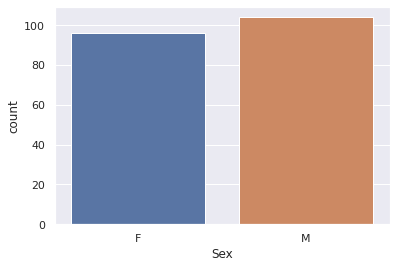

In [814]:
sns.countplot(x='Sex',data=skrr) #displays the countplot column Sex

Seeing above countplot, we can see there are more number male than female in the dataset

________________________________________________________________________________

Text(0.5, 1.0, 'Histogram of Age')

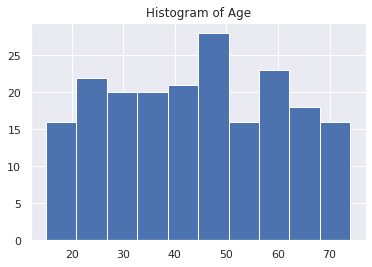

In [815]:

skrr['Age'].hist()
plt.title('Histogram of Age') #displays the histogram of column Age
  

From the above histogram , we can see all the age distribution from age 20 to 70 with the number of people.

________________________________________________________________________________

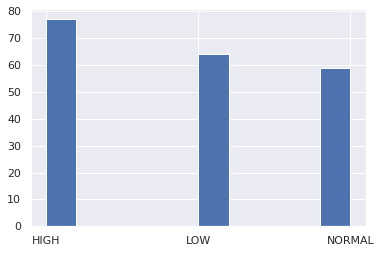

In [816]:
skrr['BP'].hist()  #displays the histogram of column BP

By seeing histogram of BP, there are three levels of BP and most of the people has HIGH BP.

________________________________________________________________________________

Text(0.5, 1.0, 'Count plot of Cholesterol')

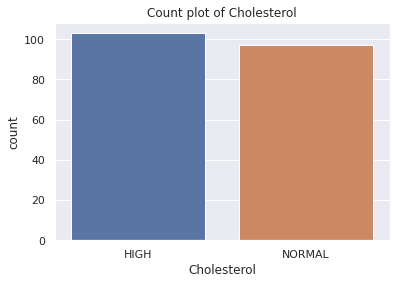

In [817]:
sns.countplot(x='Cholesterol', data=skrr) #plots countplot
plt.title('Count plot of Cholesterol') #title for the countplot


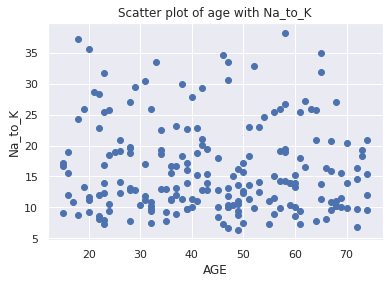

In [818]:
plt.scatter(skrr['Age'], skrr['Na_to_K']) #plots scatter plot
plt.title('Scatter plot of age with Na_to_K') #for the title
plt.xlabel('AGE') #xlabel
plt.ylabel('Na_to_K') #ylabel
plt.show()

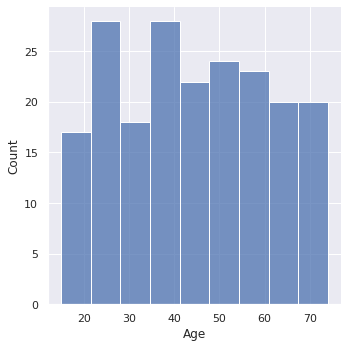

In [819]:
sns.displot(skrr['Age']) #Ploys displot of column age

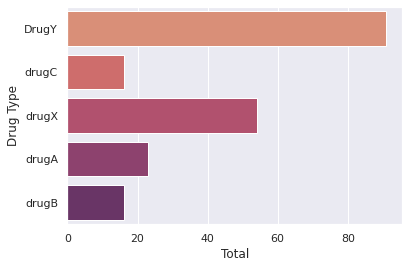

In [820]:
sns.set_theme(style="darkgrid") #sets the grid
sns.countplot(y="Drug", data=skrr, palette="flare") #plots countplot
plt.ylabel('Drug Type') #yabel
plt.xlabel('Total') #xlabel
plt.show()

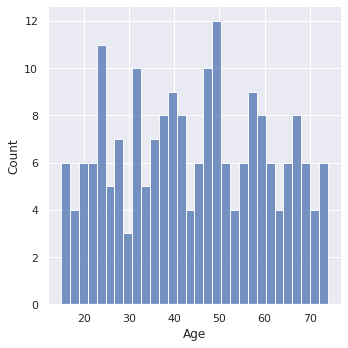

In [821]:
sns.displot(skrr['Age'].dropna(),kde=False,bins=30) #plots displot of column age

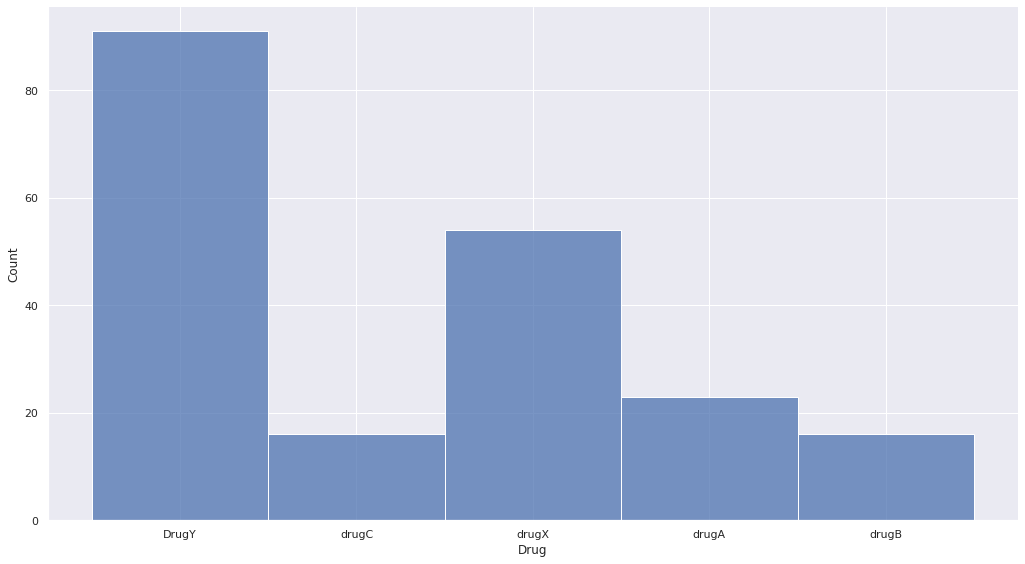

In [822]:

sns.displot(skrr['Drug'].dropna(),kde=False,bins=50,height=8,aspect=1.8) #plots displot of drug

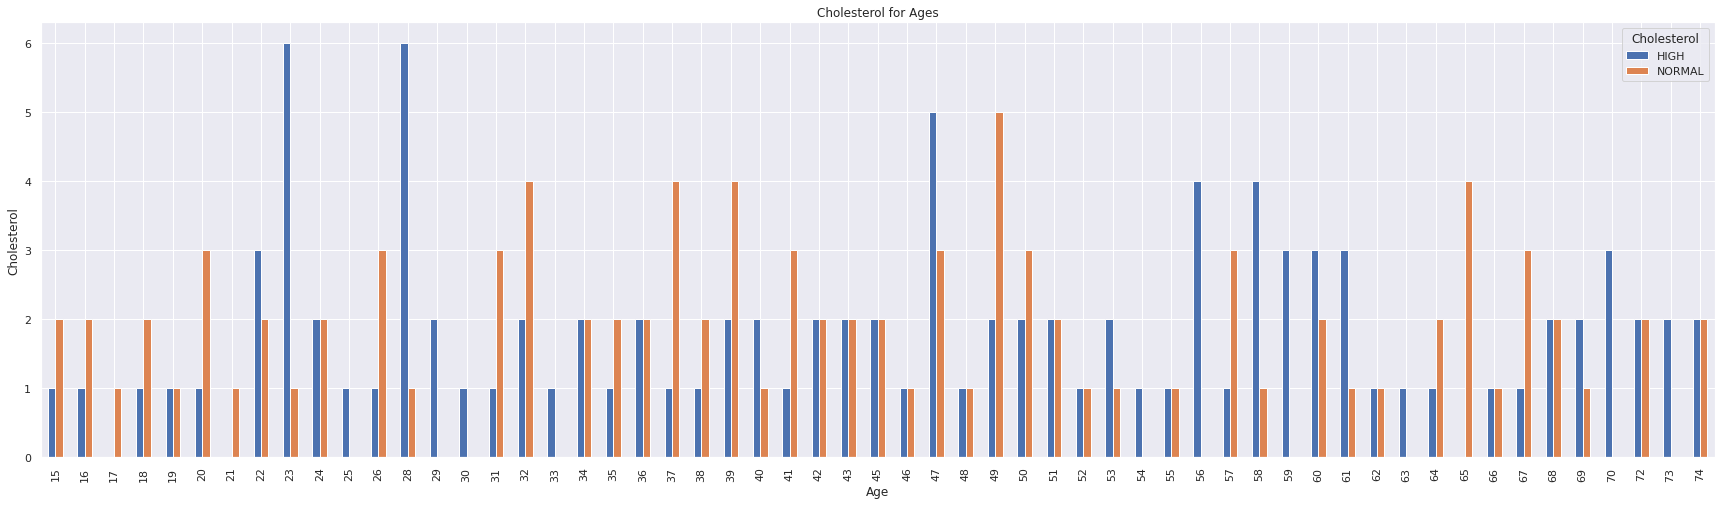

In [823]:


pd.crosstab(skrr.Age,skrr.Cholesterol).plot(kind="bar",figsize=(30,8)) #plots bar garph of age and cholesterol
plt.title('Cholesterol for Ages') #title
plt.xlabel('Age') #xlabel
plt.ylabel('Cholesterol') #ylabel

plt.show() 

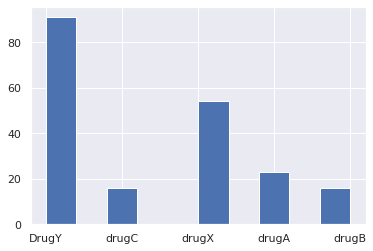

In [824]:
skrr['Drug'].hist()  #plots the histogram of column drug

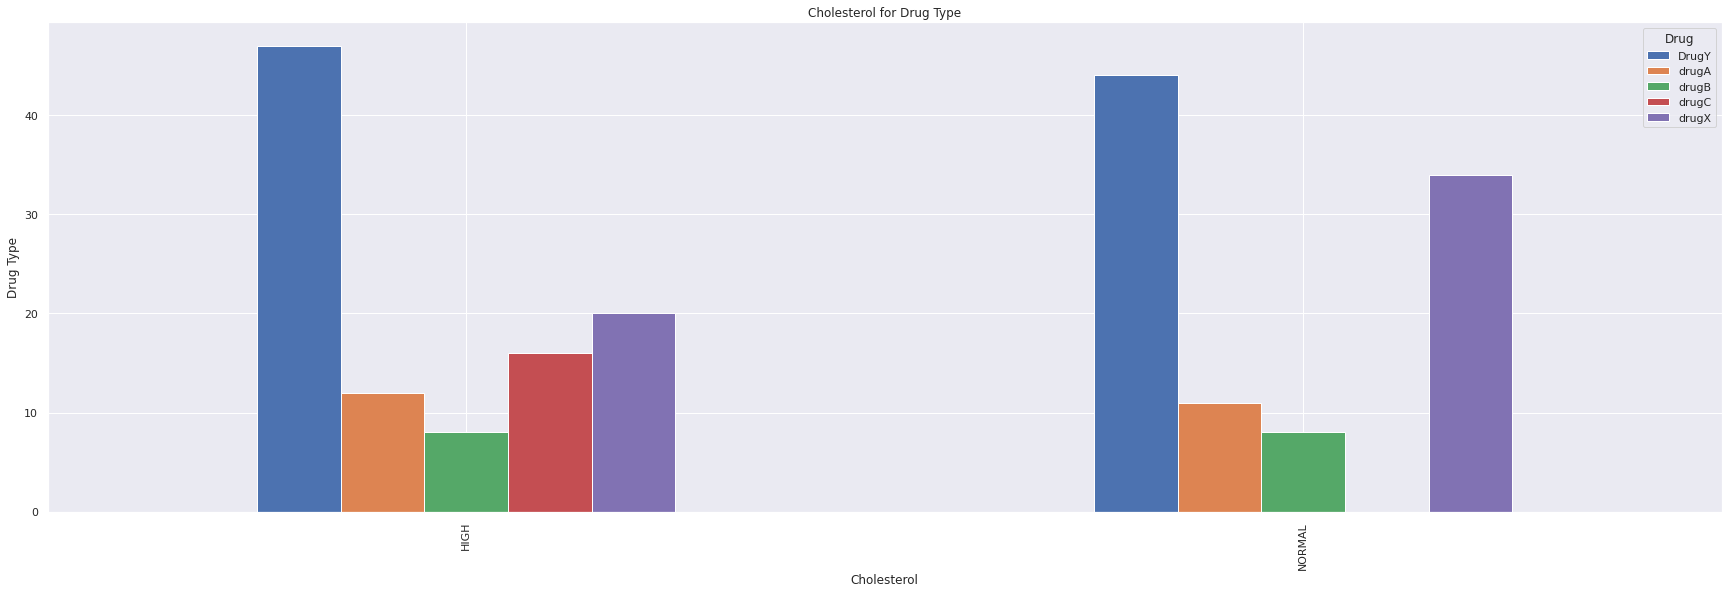

In [825]:


pd.crosstab(skrr.Cholesterol,skrr.Drug).plot(kind="bar",figsize=(30,9)) #plots the bar graph of cholesterol and drug column
plt.title('Cholesterol for Drug Type') #gives the title
plt.xlabel('Cholesterol') #xlabel
plt.ylabel('Drug Type') #ylabel

plt.show() 

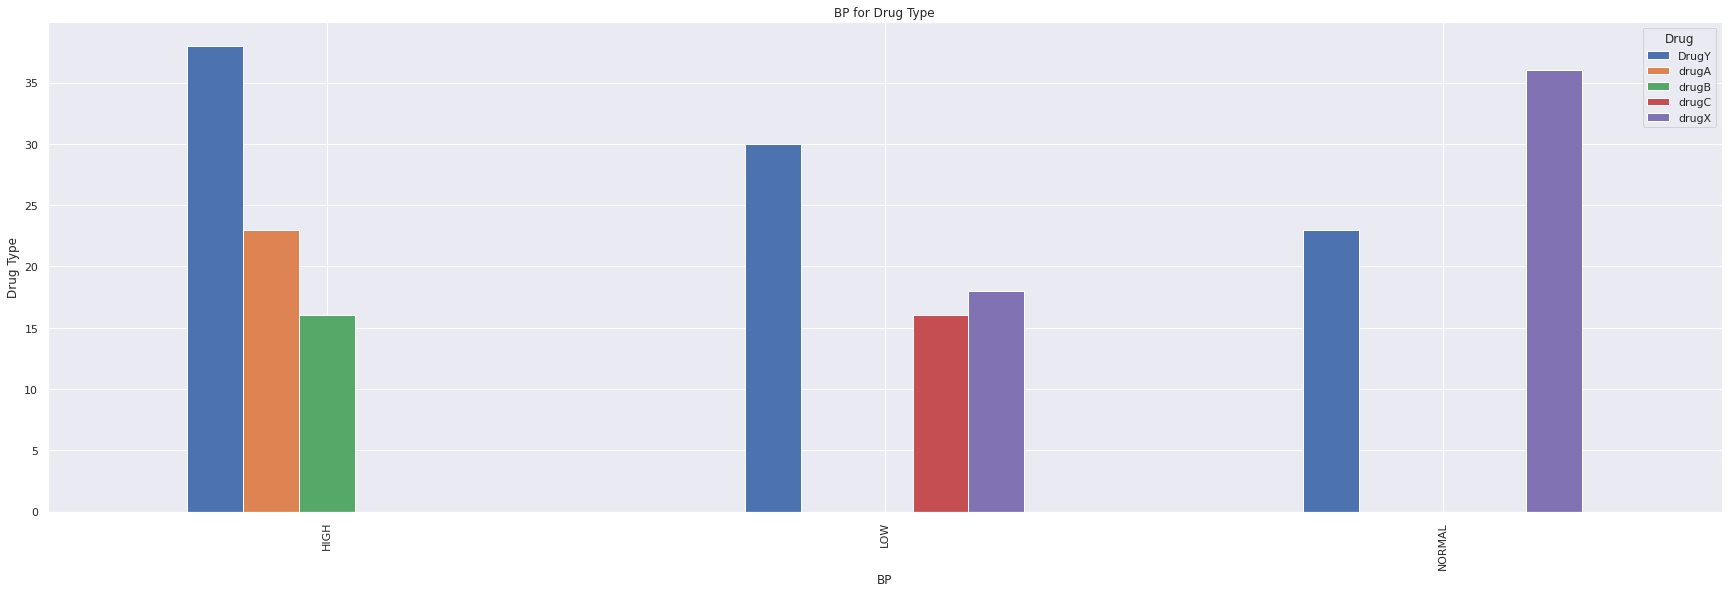

In [826]:


pd.crosstab(skrr.BP,skrr.Drug).plot(kind="bar",figsize=(30,9)) #plots the bar graph of BP and drug column
plt.title('BP for Drug Type') #gives the title
plt.xlabel('BP') #xlabel
plt.ylabel('Drug Type') #ylabel

plt.show() 

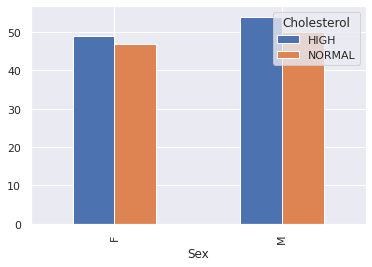

In [827]:
pd.crosstab(skrr.Sex,skrr.Cholesterol).plot(kind='bar') #plots the bar garph of column sex and cholesterol

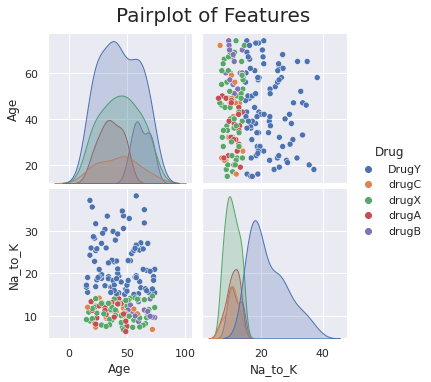

In [828]:
import seaborn as sns
# Plot pairplot to visualize the relationship between variables
sns.pairplot(skrr, hue='Drug')
plt.suptitle("Pairplot of Features", fontsize=20, y=1.05)

plt.show()

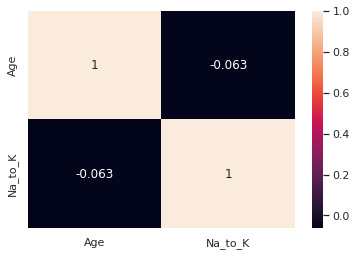

In [829]:
sns.heatmap(skrr.corr(),annot=True) #plot the heatmap of corelation matrix

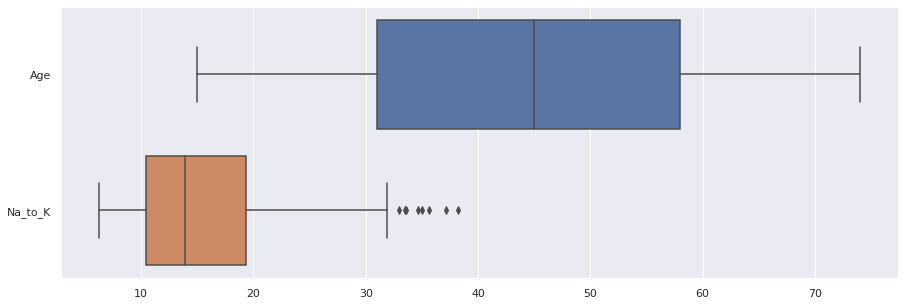

In [830]:
# Removing Outliers from the dataset
plt.figure(figsize=(15,5))
sns.boxplot(data=skrr,orient='h')

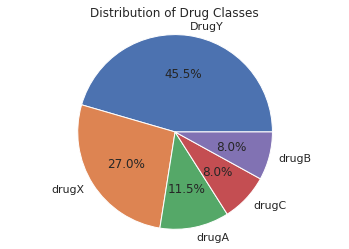

In [831]:
# Count the number of instances for each drug class
counts = skrr['Drug'].value_counts()

# Plot the counts as a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Drug Classes')
plt.show()

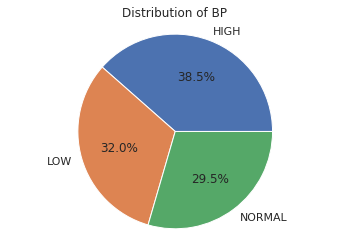

In [832]:
# Count the number of instances for each drug class
counts = skrr['BP'].value_counts()

# Plot the counts as a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%') #counts the pie chart
plt.axis('equal')
plt.title('Distribution of BP') #for the title
plt.show()

### Data Cleaning

In [833]:
skrr['Sex'].unique() #displays the unique value of column sex

array(['F', 'M'], dtype=object)

In [834]:
skrr.Sex = skrr.Sex.map({"M":1, "F":0}) #mapping into ordinal numbers

In [835]:
skrr #displays the column

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,DrugY
1,47,1,LOW,HIGH,13.093,drugC
2,47,1,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,LOW,HIGH,11.567,drugC
196,16,1,LOW,HIGH,12.006,drugC
197,52,1,NORMAL,HIGH,9.894,drugX
198,23,1,NORMAL,NORMAL,14.020,drugX


In [836]:
skrr['BP'].unique() #displays the unique value of column BP

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [837]:
skrr.BP = skrr.BP.map({"LOW":0, "NORMAL":1,"HIGH":2}) #mapping into ordinal numbers

In [838]:
skrr #displays the column

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,HIGH,25.355,DrugY
1,47,1,0,HIGH,13.093,drugC
2,47,1,0,HIGH,10.114,drugC
3,28,0,1,HIGH,7.798,drugX
4,61,0,0,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,0,HIGH,11.567,drugC
196,16,1,0,HIGH,12.006,drugC
197,52,1,1,HIGH,9.894,drugX
198,23,1,1,NORMAL,14.020,drugX


In [839]:
skrr['Cholesterol'].unique() #displays the unique value of column cholesterol

array(['HIGH', 'NORMAL'], dtype=object)

In [840]:
skrr.Cholesterol = skrr.Cholesterol.map({"NORMAL":0,"HIGH":1}) #mapping into ordinal numbers

In [841]:
skrr #displays the column

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,DrugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,0,1,11.567,drugC
196,16,1,0,1,12.006,drugC
197,52,1,1,1,9.894,drugX
198,23,1,1,0,14.020,drugX


In [842]:
skrr['Drug'].unique() #displays the unique value of column Drug

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [843]:
skrr.Drug = skrr.Drug.map({"DrugY":0, "drugC":1,"drugX":2,"drugA":3,"drugB":4}) #mapping into ordinal numbers

In [844]:
skrr #displays the column

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,0
1,47,1,0,1,13.093,1
2,47,1,0,1,10.114,1
3,28,0,1,1,7.798,2
4,61,0,0,1,18.043,0
...,...,...,...,...,...,...
195,56,0,0,1,11.567,1
196,16,1,0,1,12.006,1
197,52,1,1,1,9.894,2
198,23,1,1,0,14.020,2


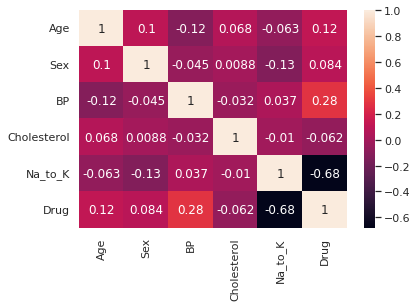

In [845]:
sns.heatmap(skrr.corr(),annot=True) #displays the heatmap of corelation values

In [846]:
skrr.drop(['Sex', ], axis=1, inplace=True) #drop the colums

In [847]:
skrr #displays the columns

,Age,BP,Cholesterol,Na_to_K,Drug
0,23,2,1,25.355,0
1,47,0,1,13.093,1
2,47,0,1,10.114,1
3,28,1,1,7.798,2
4,61,0,1,18.043,0
...,...,...,...,...,...
195,56,0,1,11.567,1
196,16,0,1,12.006,1
197,52,1,1,9.894,2
198,23,1,0,14.020,2


# Build Primary Model[Logistic Regression][5]:

In [848]:
skrr.head(10) #displays the first 10 data

,Age,BP,Cholesterol,Na_to_K,Drug
0,23,2,1,25.355,0
1,47,0,1,13.093,1
2,47,0,1,10.114,1
3,28,1,1,7.798,2
4,61,0,1,18.043,0
5,22,1,1,8.607,2
6,49,1,1,16.275,0
7,41,0,1,11.037,1
8,60,1,1,15.171,0
9,43,0,0,19.368,0


### Preprocessing the data

In [849]:
skrr.describe() #displays the description from the table

,Age,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,1.065000,0.515000,16.084485,1.285000
std,16.544315,0.839224,0.501029,7.223956,1.353861
min,15.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,10.445500,0.000000
50%,45.000000,1.000000,1.000000,13.936500,1.000000
75%,58.000000,2.000000,1.000000,19.380000,2.000000
max,74.000000,2.000000,1.000000,38.247000,4.000000


In [850]:
skrr.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   BP           200 non-null    int64  
 2   Cholesterol  200 non-null    int64  
 3   Na_to_K      200 non-null    float64
 4   Drug         200 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 7.9 KB


In [851]:
# inDependent 
y = skrr['Drug']

In [852]:
y.unique() #displays the unique value of column Drug

array([0, 1, 2, 3, 4])

In [853]:
# Independent 
X = skrr.drop(['Drug'], axis = 1)
print(X.shape)
print(X.columns)

(200, 4)
Index(['Age', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')


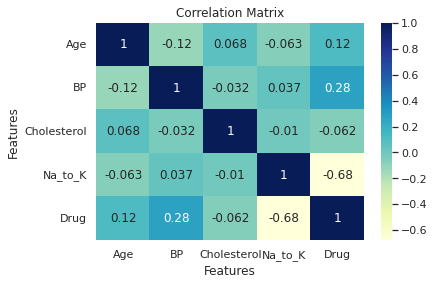

In [854]:
import seaborn as sns
corelation_matrix = skrr.corr()
sns.heatmap(corelation_matrix, annot=True, cmap = "YlGnBu")
# Add labels and titles to the plot
plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")

# Show the plot
plt.show()


In [855]:
skrr.Drug.value_counts() #count the value of drug type

0    91
2    54
3    23
1    16
4    16
Name: Drug, dtype: int64

In [856]:
skrr.Drug.unique() #displays the unique value of column Drug

array([0, 1, 2, 3, 4])

## Spliting the data

In [857]:
from sklearn.model_selection import train_test_split

In [858]:
from sklearn.metrics import accuracy_score

In [859]:
X.shape #shows the shape of independent variable

(200, 4)

# Model Evaluation[1]:

### Train the logistic regression model

In [860]:
#training the model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

print('Size of X_train = ', X_train.shape) #prints the size of first train
print('Size of X_test  = ', X_test.shape) #prints the size of first test
print('Size of y_train = ', y_train.shape) #prints the size of second train
print('Size of y_test  = ', y_test.shape) #prints the size of second test

Size of X_train =  (150, 4)
Size of X_test  =  (50, 4)
Size of y_train =  (150,)
Size of y_test  =  (50,)


In [861]:
from sklearn.preprocessing import StandardScaler #to standardize the features in a dataset.
sc = StandardScaler() #creating the instance

In [862]:
X_train = sc.fit_transform(X_train) #Standardize the first train model
X_test = sc.transform(X_test) #Standardize the first test model

### Logistic regression 

In [863]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=10000, num_classes=5):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.num_classes = num_classes
        
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
    
    def one_hot_encoding(self, y):
        one_hot = np.zeros((y.shape[0], self.num_classes))
        one_hot[np.arange(y.shape[0]), y] = 1
        return one_hot
    
    def loss(self, h, y_encoded):
        return -np.mean(y_encoded * np.log(h))
    
    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.weights = np.zeros((X.shape[1], self.num_classes))
        y_encoded = self.one_hot_encoding(y)
        
        for i in range(self.num_iterations):
            z = X @ self.weights
            h = self.softmax(z)
            gradient = X.T @ (h - y_encoded) / y.size
            self.weights -= self.learning_rate * gradient
            
    def predict_probability(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        z = X @ self.weights
        return self.softmax(z)
    
    def predict(self, X):
        return np.argmax(self.predict_probability(X), axis=1)

In [864]:
# creating our model instance

log_reg = LogisticRegression()

# fitting the model
log_reg.fit(X_train, y_train)

### Prediction

In [865]:
# predicting the target vectors

y_pred=log_reg.predict(X_test)

In [866]:
print("Model predictions are :" )
y_pred[:15]


Model predictions are :


array([1, 2, 0, 0, 0, 2, 2, 2, 1, 2, 3, 0, 0, 0, 4])

In [867]:
print("Actual values are :" )
y_test

Actual values are :


18     1
170    2
107    0
98     0
177    0
182    2
5      2
146    2
12     0
152    2
61     3
125    0
180    0
154    0
80     4
7      1
33     0
130    0
37     2
74     0
183    0
145    2
45     2
159    2
60     0
123    0
179    0
185    0
122    0
44     2
16     2
55     1
150    3
111    2
22     0
189    0
129    2
4      0
83     3
106    2
134    0
66     3
26     0
113    2
168    0
63     2
8      0
75     0
118    3
143    0
Name: Drug, dtype: int64

In [868]:
lr_pred = log_reg.predict(X_test)
pd.DataFrame(np.c_[y_test,lr_pred],columns=['Actual','Predicted']).head(15)

,Actual,Predicted
0,1,1
1,2,2
2,0,0
3,0,0
4,0,0
5,2,2
6,2,2
7,2,2
8,0,1
9,2,2


In [869]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [870]:
from sklearn.metrics import classification_report

In [871]:
from sklearn.metrics import accuracy_score

### Confusion Matrix

In [872]:
confusion_matrix(y_test, y_pred) #creates the confusion matrix

array([[23,  1,  0,  0,  1],
       [ 0,  3,  0,  0,  0],
       [ 0,  0, 16,  0,  0],
       [ 0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  1]])

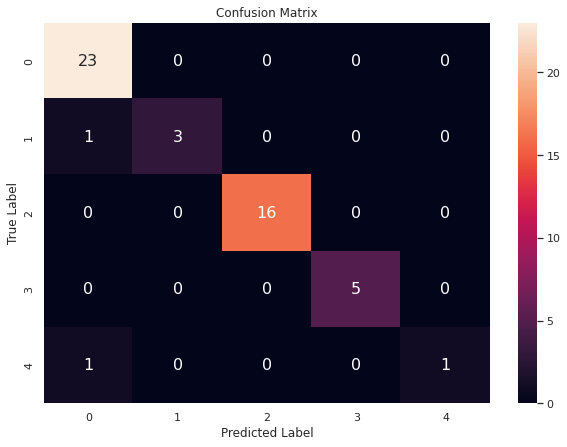

In [873]:
# creating confusion matrix heatmap

conf_mat = pd.DataFrame(confusion_matrix(y_pred, y_test))
fig = plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Prediction

In [874]:
# getting precision, recall and f1-score via classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         5
           4       0.50      1.00      0.67         1

    accuracy                           0.96        50
   macro avg       0.85      0.98      0.90        50
weighted avg       0.97      0.96      0.96        50



### Accuracy

In [875]:
# let's look at our accuracy

accuracy = accuracy_score(y_pred, y_test)

print(f"The accuracy on test set using Logistic Regression is: {np.round(accuracy, 3)*100.0}%")

The accuracy on test set using Logistic Regression is: 96.0%


# Dimensionality Reduction[6]:

In [876]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

# Fit and transform the first_train dataset using the sc instance of StandardScaler
first_train1 = pca.fit_transform(X_train)

# Transform the first_test dataset using the sc instance of StandardScaler
first_test1 = pca.transform(X_test)

# Create an instance of the LogisticRegression class
log_reg1 = LogisticRegression()

# Fit the logistic regression model to the first_train and second_train datasets
log_reg1.fit(first_train1, y_train)

# predicting the target vectors
second_pred1=log_reg1.predict(first_test1)

# Predict the target values for the first_test dataset using the trained logistic regression model
log_reg_pred1 = log_reg1.predict(first_test1)

# Create a dataframe to display the actual target values and the predicted target values
result1 = pd.DataFrame(np.c_[y_test, log_reg_pred1], columns=['Actual', 'Predicted'])

# Display the first 5 rows of the result dataframe
result1.sample(15)

,Actual,Predicted
7,2,2
19,0,0
24,0,0
39,2,0
0,1,2
33,2,2
28,0,0
4,0,0
5,2,2
36,2,4


In [877]:
# getting precision, recall and f1-score via classification report using PCA

print(classification_report(y_test, second_pred1))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.00      0.00      0.00         3
           2       0.80      0.75      0.77        16
           3       0.67      0.80      0.73         5
           4       0.33      1.00      0.50         1

    accuracy                           0.78        50
   macro avg       0.54      0.69      0.58        50
weighted avg       0.77      0.78      0.77        50



### Accuracy

In [878]:
# Calculate the accuracy of the logistic regression model using PCA
accuracy1 = accuracy_score(second_pred1, y_test)

# Print the accuracy of the model, rounded to 3 decimal places and expressed as a percentage using PCA
print(f"The accuracy on test set using Logistic Regression(With PCA) is: {np.round(accuracy1, 3)*100.0}%")

The accuracy on test set using Logistic Regression(With PCA) is: 78.0%


In [879]:
y_pred_prob = log_reg.predict_probability(X_test)

In [880]:
y_pred= log_reg.predict(X_test)

In [881]:
y_pred_prob[0][:]

array([6.17965203e-04, 6.51456222e-01, 3.46580192e-01, 1.33629367e-03,
       9.32693408e-06])

In [882]:
y_pred[:5]

array([1, 2, 0, 0, 0])

## Visualization after Logistic Regression

## ROC Curve:

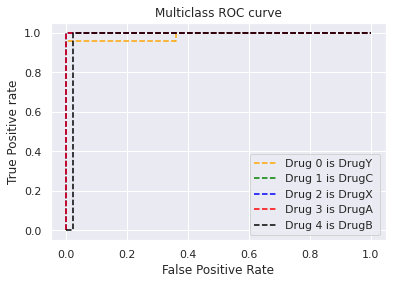

In [883]:
from sklearn.metrics import roc_auc_score,roc_curve
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Drug 0 is DrugY')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Drug 1 is DrugC')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Drug 2 is DrugX ')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Drug 3 is DrugA')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Drug 4 is DrugB ')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=700); 



In [884]:
fpr[1]

array([0., 0., 0., 1.])

In [885]:
tpr[1]

array([0.        , 0.33333333, 1.        , 1.        ])

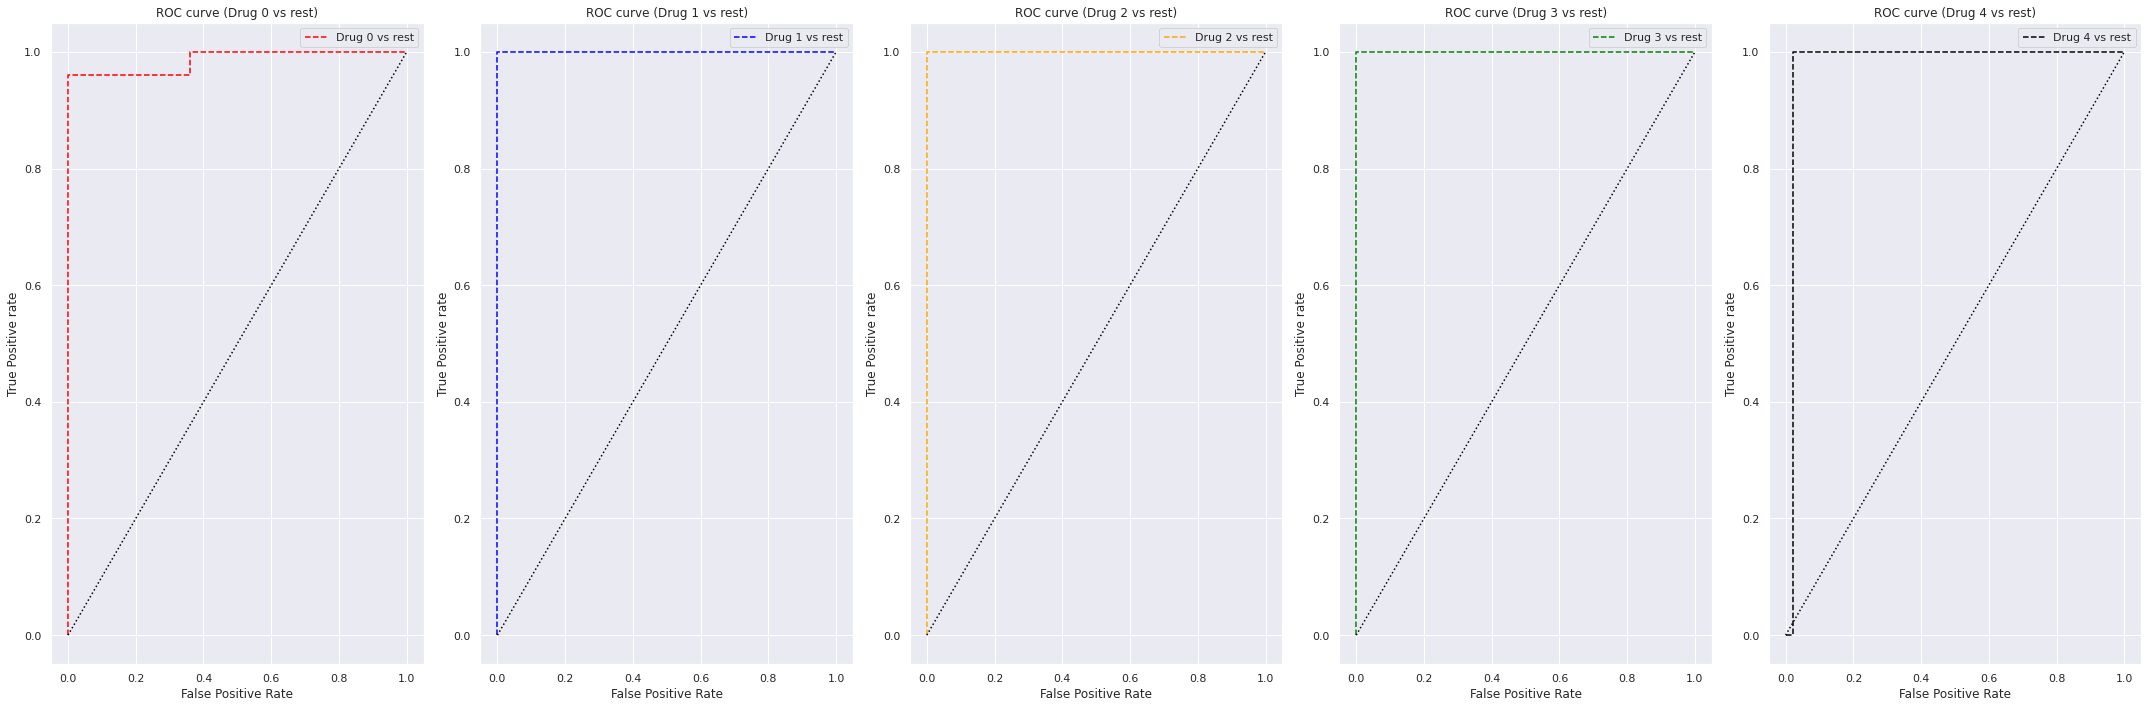

In [886]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# roc curve for classes
fpr = {}
tpr = {}
thresh = {}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)

# create subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 10))
color=['red','blue','orange','green','black']

# plot each ROC curve in a separate subplot
for i, ax in zip(range(n_class), axes.flatten()):
    ax.plot(fpr[i], tpr[i], linestyle='--', label=f'Drug {i} vs rest',color=color[i])
    ax.plot([0, 1], [0, 1], linestyle=':', color='black')
    ax.set_title(f'ROC curve (Drug {i} vs rest)')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive rate')
    ax.legend()

plt.tight_layout()
plt.show()


# Conclusion[1]:

I have conducted two model evaluation. First, I standardized the data using a standard scalar, and my model's accuracy is 96.0 percent. Second, I used PCA to reduce the model's dimensions, and the accuracy I achieved was 78.0 percent. 

Several reasons could be to responsible for this drop in accuracy.

Overfitting: PCA can occasionally lead to overfitting, in which the model performs worse on fresh data because it is too closely matched to the training set.

Loss of information: PCA can lead to a decrease in the quantity of information in a dataset by reducing the number of features in the dataset. Accuracy might suffer as a result of the less information.
